# Name==Parveen Kumar
student Id==8822123


In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Step 1: Data Understanding
Begin by loading the dataset and learning about its structure and contents. The dataset should include characteristics as well as a target variable that indicates whether or not the transaction is fraudulent.

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.shape

(284807, 31)

# Step 2: Data Preprocessing
Handle missing values, scale numerical characteristics, and encode categorical information as needed during data preparation. Although there are no missing values in this scenario, feature scaling and encoding categorical variables are still critical tasks.

In [6]:
from sklearn.preprocessing import StandardScaler

C:\Users\HP\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [7]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

# Step 3: Data Analysis
Data analysis can assist us in comprehending feature distribution and class balance (fraudulent vs. non-fraudulent transactions)

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Distribution of Fraud and Safe transactions ')

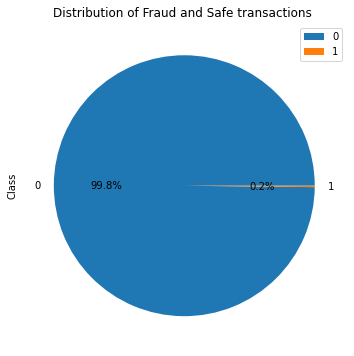

In [10]:
m = df['Class'].value_counts()
m.plot(kind ='pie', autopct = '%1.1f%%', figsize = (12,6))
plt.legend()
plt.title('Distribution of Fraud and Safe transactions ')

Text(0, 0.5, 'Mean of Transaction Amount')

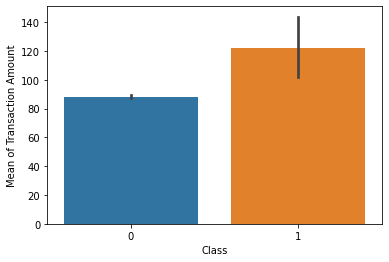

In [11]:
sns.barplot(data=df, x="Class", y='Amount')
plt.ylabel('Mean of Transaction Amount')

# Step 4: Splitting Data
Split the dataset into training and testing sets. We will use 70% of the data for training and 30% for testing.

In [12]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RandomizedSearchCV


In [13]:
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])

In [14]:
X = df.drop('Class', axis = 1)
y = df['Class']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 49)

# Step 5: Model Training
Using the training data, create a logistic regression model. For binary classification applications such as fraud detection, logistic regression is a common alternative.

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
# Create and train the logistic regression model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Step 6: Model Evaluation
Evaluate the logistic regression model on the test data to determine its accuracy.

from sklearn.metrics import accuracy_score

In [59]:
from sklearn.metrics import accuracy_score

In [72]:
y_pred = logistic_regression_model.predict(X_test)


In [73]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9989700736163291


# Building A predictive model
By taking a random example from main csv file

In [62]:
input=(310,-1.01328699662916,0.512380148221401,0.837259149525409,0.408468269981739,2.07853524414425,4.6926617230903,-0.294088412248878,0.898044188233546,0.919346554981177,0.321821402182548,-1.04992305058353,0.186009741260069,-0.421530266383873,-1.02874657440449,-1.32120125976266,-1.14056095290532,0.252886911885721,-0.218197255313748,2.05891341647441,0.207566369183217,-0.470714367042409,-0.879661024740198,-0.147591261779969,1.0031812911417,0.118078920398375,-0.460627055151817,-0.271699744384913,0.0124462117764752,22.09)

In [21]:
array_1=np.asarray(input)

In [22]:
array_1_reshaped=array_1.reshape(1,-1)

In [23]:
predict_1=logistic_regression_model.predict(array_1_reshaped)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [24]:
if predict_1[0]==0:
    print("it is not fraud")
else: 
    print("this is fraud")

it is not fraud


# Part-II

# Step 1: 
Data Understanding (Assuming the dataset is loaded into df)

In [25]:
df_2=pd.read_csv('insurance.csv')

In [26]:
df_2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [27]:
print(df_2.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [28]:
df_2.shape

(1338, 7)

# Step 2: Data Preprocessing

In [29]:
df_2[df_2.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [30]:
df_2.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
label_encoder = LabelEncoder()
df_2['sex'] = label_encoder.fit_transform(df_2['sex'])
df_2['smoker'] = label_encoder.fit_transform(df_2['smoker'])
df_2['region'] = label_encoder.fit_transform(df_2['region'])

In [33]:
df_2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# Step 3: Data Analysis 

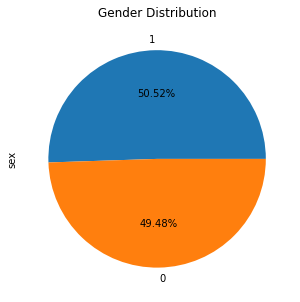

In [36]:
plt.figure(figsize=(5, 5))
df_2['sex'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.title('Gender Distribution')
plt.show()

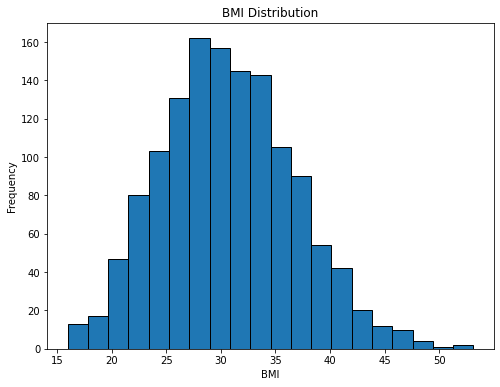

In [37]:
plt.figure(figsize=(8, 6))
plt.hist(df_2['bmi'], bins=20, edgecolor='black')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('BMI Distribution')
plt.show()

In [34]:
# Step 4: Splitting Data
from sklearn.model_selection import train_test_split

In [35]:
a = df_2.drop('charges', axis=1)
b = df_2['charges']

In [38]:
a_train, a_test, b_train, b_test = train_test_split(a,b, test_size=0.3, random_state=22)

# Step 5: Model Training


In [41]:
from sklearn.linear_model import LinearRegression

In [40]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(a_train, b_train)

LinearRegression()

# Step 6: Model Evaluation

In [75]:
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score

In [76]:
# Evaluate the model using Mean Squared Error and R-squared (Coefficient of Determination)
mse = mean_squared_error(b_test, z_pred)
r2 = r2_score(b_test, z_pred)

In [77]:
print("Mean Squared Error:", mse)
print("R-squared (Coefficient of Determination):", r2)

Mean Squared Error: 40885343.170665525
R-squared (Coefficient of Determination): 0.7404808275197812


In [74]:
b_pred = linear_regression_model.predict(a_test)

In [88]:
b_pred = pd.DataFrame(b_pred)

In [90]:
b_test = pd.DataFrame(b_test)

In [91]:
accuracy_2=accuracy_score(b_test,b_pred)

ValueError: continuous is not supported

# Building A predictive model
By taking a random example from main csv file

In [54]:
input_2=(28,1,33.000,3,0,2)

In [55]:
array_2=np.asarray(input_2)

In [56]:
array_2_reshaped=array_2.reshape(1,-1)

In [57]:
predict_2=linear_regression_model.predict(array_2_reshaped)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [58]:
print(predict_2[0])

6811.110134015227
